In [13]:
import pandas as pd

In [14]:
no_metro = pd.read_csv('../Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [15]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [16]:
no_metro = no_metro[['funding_status', 'poverty_level', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached']]

In [18]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [20]:
#Import model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\Caitlin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Caitlin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
#Predict a value
predicted = model.predict(X_test)

from sklearn.metrics import roc_auc_score
rocauc = roc_auc_score(y_test, predicted)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, predicted)


from sklearn.metrics import log_loss
from math import exp

lol = log_loss(y_test, predicted)

print(rocauc, average_precision, exp(lol))

0.5117598949253144 0.7043134083630799 29777.575233208423


[[  3015  82638]
 [  2327 196896]]


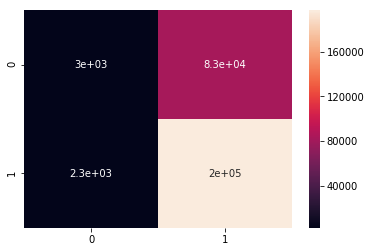

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,predicted)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()